In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def plot_regret(df, label):
    plt.semilogx(df.maximum_reward - df.reward, label=label)
    
def plot_percentage_optimal_actions(df, label):
    plt.semilogx(df.best_actions / df.total_actions, label = label)


# Experiment 1

In [11]:
UCBStar = pd.read_csv("experiment-1/UCBStar.txt", sep = " ")
UCBFC = pd.read_csv("experiment-1/UCBFC.txt", sep = " ")
UCBFD = pd.read_csv("experiment-1/UCBFD.txt", sep = " ")
UCBCircular = pd.read_csv("experiment-1/UCBCircular.txt", sep = " ")


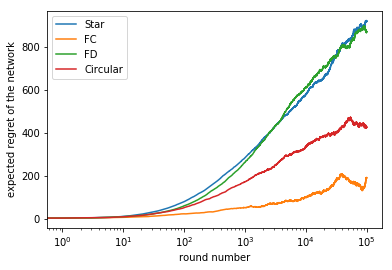

In [13]:
plot_regret(UCBStar, "Star")
plot_regret(UCBFC, "FC")
plot_regret(UCBFD, "FD")
plot_regret(UCBCircular, "Circular")
plt.xlabel("round number")
plt.ylabel("expected regret of the network")
plt.legend()
plt.show()

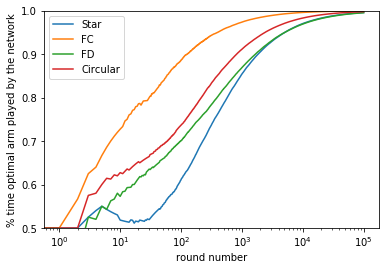

In [16]:
plot_percentage_optimal_actions(UCBStar, "Star")
plot_percentage_optimal_actions(UCBFC, "FC")
plot_percentage_optimal_actions(UCBFD, "FD")
plot_percentage_optimal_actions(UCBCircular, "Circular")
plt.xlabel("round number")
plt.ylabel("% time optimal arm played by the network")
plt.ylim((0.5, 1))
plt.legend()
plt.show()

# Experiment 2

In [4]:
UCBStar = pd.read_csv("experiment-2/UCBStar.txt", sep = " ")
UCBFC = pd.read_csv("experiment-2/UCBFC.txt", sep = " ")
UCBFD = pd.read_csv("experiment-2/UCBFD.txt", sep = " ")
UCBCircular = pd.read_csv("experiment-2/UCBCircular.txt", sep = " ")


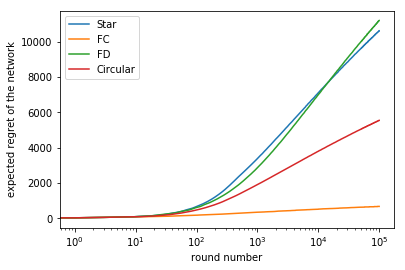

In [5]:
plot_regret(UCBStar, "Star")
plot_regret(UCBFC, "FC")
plot_regret(UCBFD, "FD")
plot_regret(UCBCircular, "Circular")
plt.xlabel("round number")
plt.ylabel("expected regret of the network")
plt.legend()
plt.show()

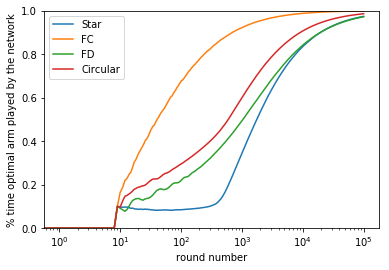

In [7]:
plot_percentage_optimal_actions(UCBStar, "Star")
plot_percentage_optimal_actions(UCBFC, "FC")
plot_percentage_optimal_actions(UCBFD, "FD")
plot_percentage_optimal_actions(UCBCircular, "Circular")
plt.xlabel("round number")
plt.ylabel("% time optimal arm played by the network")
plt.ylim((0., 1))
plt.legend()
plt.show()